In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("nba_salaries_2.csv")

In [4]:
print(df.columns)

Index(['ID', 'Player Name', 'Salary', 'Position', 'Age', 'Team', 'GP', 'GS',
       'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%',
       'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK',
       'TOV', 'PF', 'PTS', 'Player-additional', 'Linear_PER'],
      dtype='object')


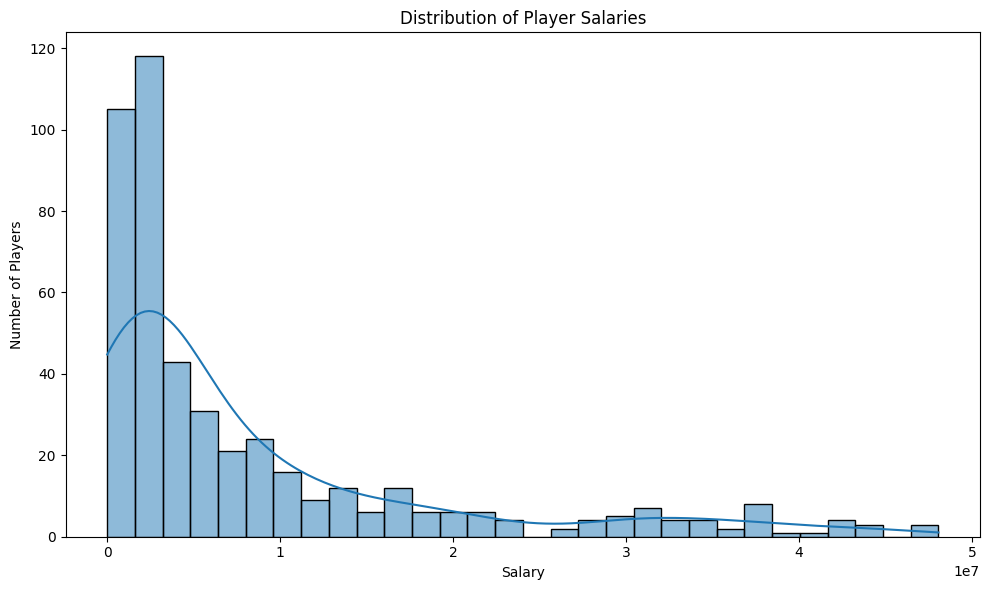

In [3]:
plt.figure(figsize=(10, 6))
sns.histplot(df["Salary"], bins=30, kde=True)
plt.title("Distribution of Player Salaries")
plt.xlabel("Salary")
plt.ylabel("Number of Players")
plt.tight_layout()
plt.show()

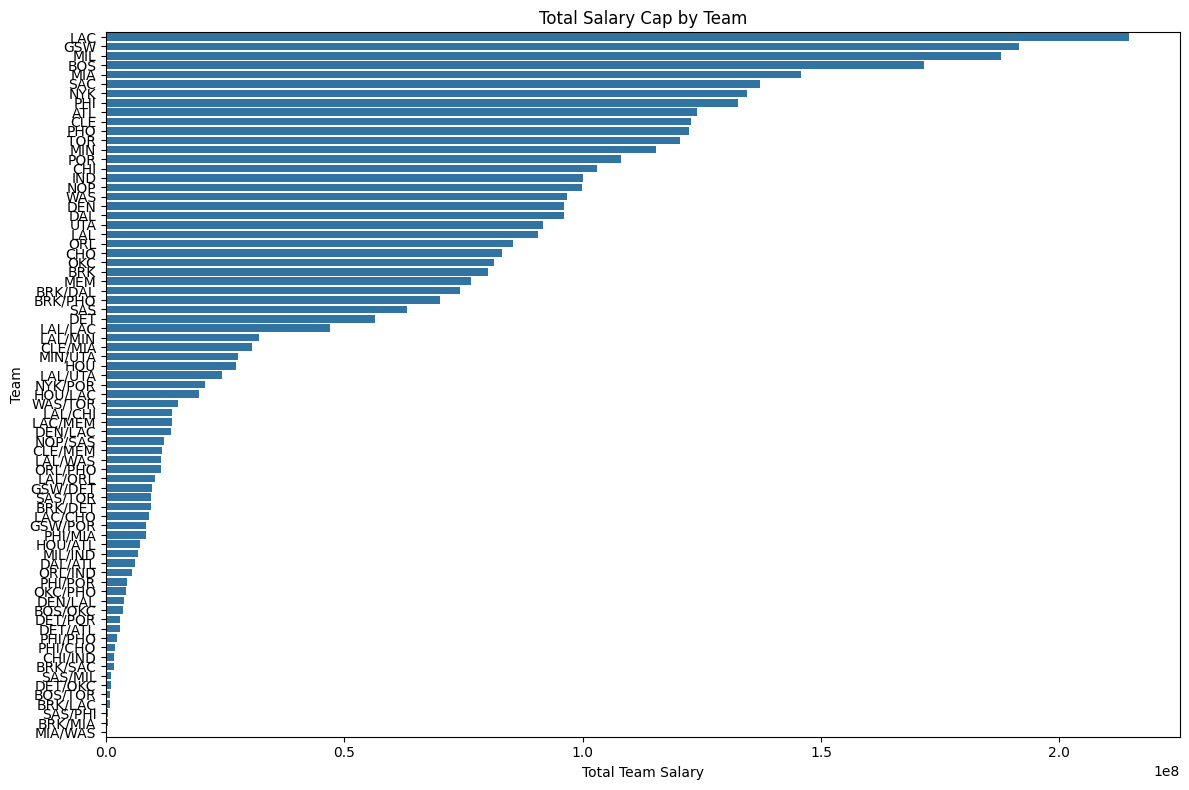

In [4]:
team_salary = (
    df.groupby("Team")["Salary"]
    .sum()
    .reset_index()
    .sort_values("Salary", ascending=False)
)

plt.figure(figsize=(12, 8))
sns.barplot(x="Salary", y="Team", data=team_salary)
plt.title("Total Salary Cap by Team")
plt.xlabel("Total Team Salary")
plt.ylabel("Team")
plt.tight_layout()
plt.show()

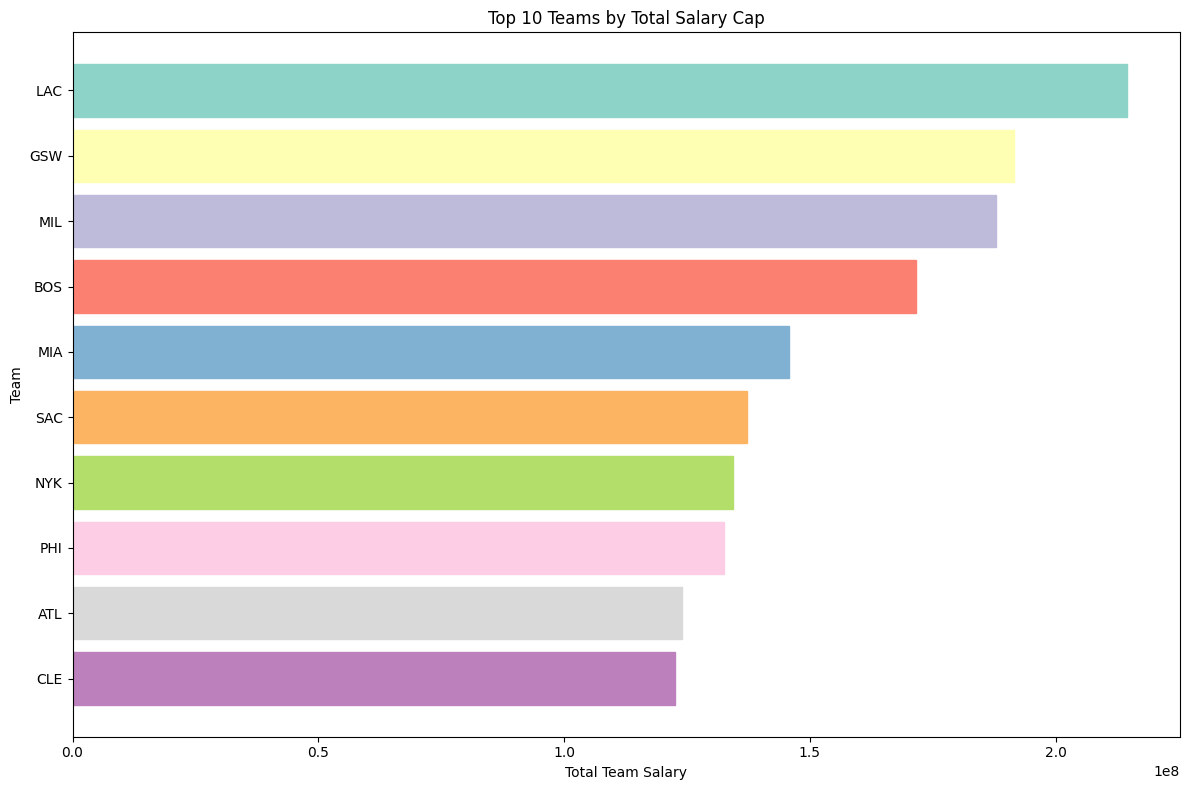

In [7]:
# Group by team and sum salaries
team_salary = df.groupby("Team")["Salary"].sum().reset_index()

# Sort descending and get top 10 teams
top_10_teams = team_salary.sort_values("Salary", ascending=False).head(10)

# Plot with different colors for each bar
plt.figure(figsize=(12, 8))
bars = plt.barh(top_10_teams["Team"], top_10_teams["Salary"])

# Assign different colors to each bar
colors = plt.cm.Set3(range(len(top_10_teams)))
for bar, color in zip(bars, colors):
    bar.set_color(color)

plt.title("Top 10 Teams by Total Salary Cap")
plt.xlabel("Total Team Salary")
plt.ylabel("Team")
plt.gca().invert_yaxis()  # Highest salary at top
plt.tight_layout()
plt.show()

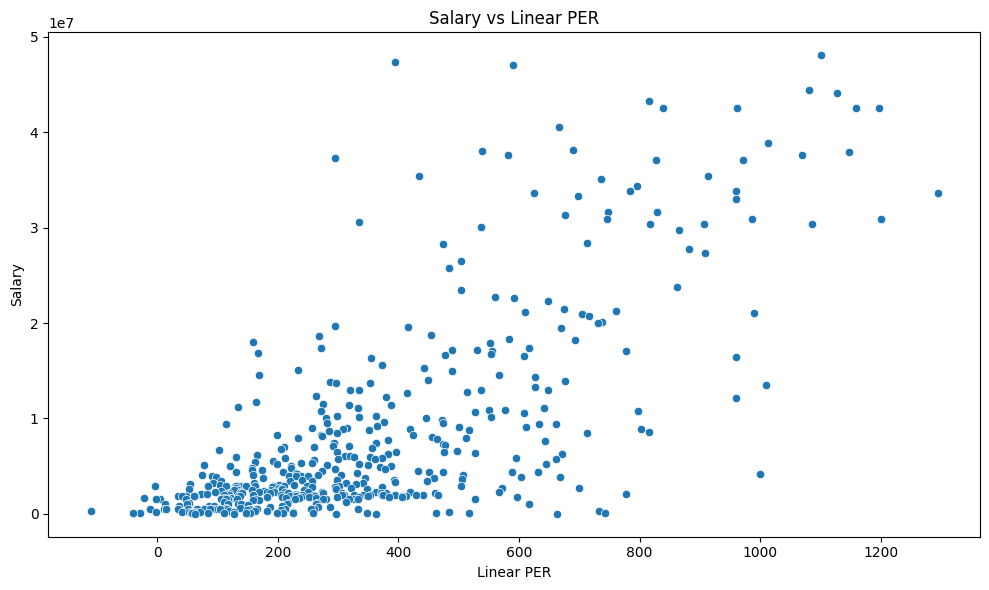

In [5]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Linear_PER", y="Salary", data=df)
plt.title("Salary vs Linear PER")
plt.xlabel("Linear PER")
plt.ylabel("Salary")
plt.tight_layout()
plt.show()

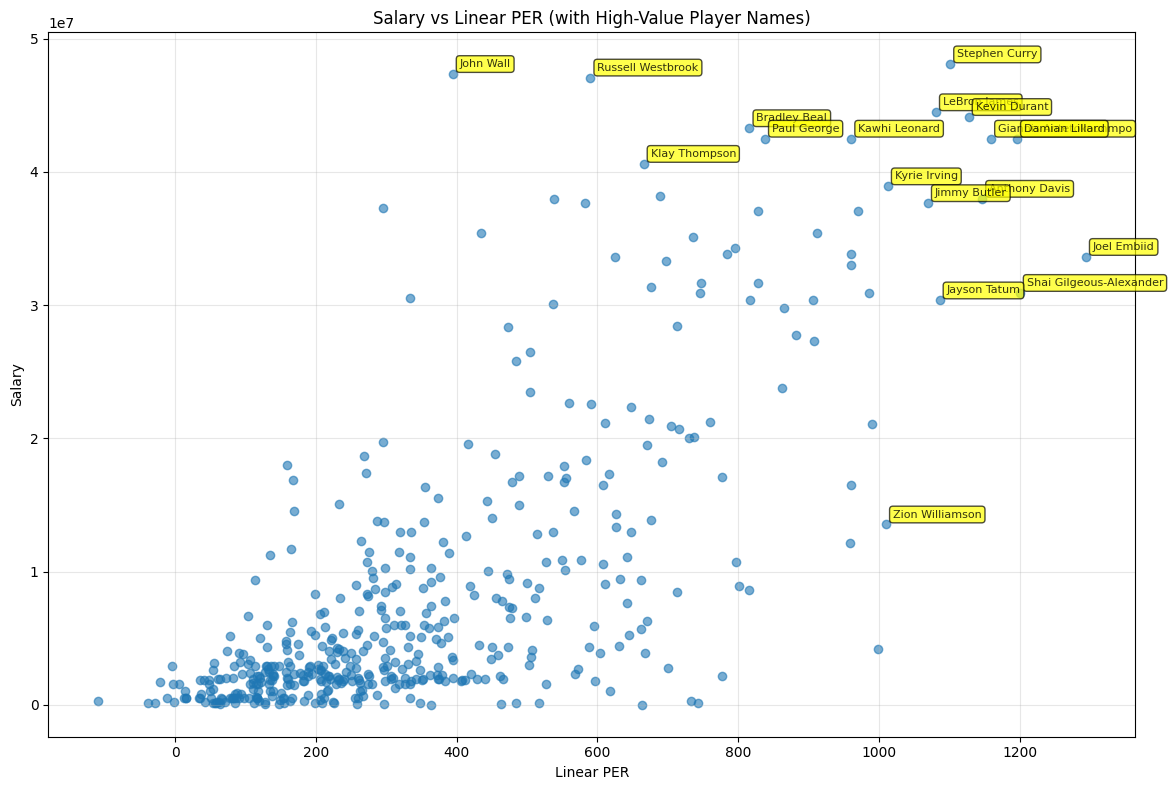

In [10]:
# Create the scatter plot
plt.figure(figsize=(12, 8))
plt.scatter(df["Linear_PER"], df["Salary"], alpha=0.6)

# Filter players with salary >= 40,000,000 OR Linear_PER >= 1000
high_value_players = df[(df["Salary"] >= 40000000) | (df["Linear_PER"] >= 1000)]

# Add player names as annotations for high-value players
for idx, row in high_value_players.iterrows():
    plt.annotate(
        row["Player Name"],
        (row["Linear_PER"], row["Salary"]),
        xytext=(5, 5),
        textcoords="offset points",
        fontsize=8,
        alpha=0.8,
        bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.7),
    )

plt.title("Salary vs Linear PER (with High-Value Player Names)")
plt.xlabel("Linear PER")
plt.ylabel("Salary")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()